### Richard Castaneda LSTM Midterm ###

In [38]:
# IMPORT BASIC lIBRARIES

import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [39]:
# For timeseries RNN LSTM neural network

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense

In [40]:
# IMPORT KERAS: TimeseriesGenerator
#This class produce time series batches use on training/testing the model
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

# IMPORT KERAS: MinMaxScaler
# This class is used to pre process (scale) the data
from sklearn.preprocessing import MinMaxScaler

In [46]:
dfTSLA = 'Downloads/TSLA.csv'

In [47]:
df_ALL = pd.read_csv(dfTSLA)

In [48]:
df_ALL.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,3/5/2018,22.159332,22.516666,21.952667,22.223333,22.223333,57357000
1,3/6/2018,22.250000,22.424667,21.802000,21.879999,21.879999,64285500
2,3/7/2018,21.695999,22.166668,21.449333,22.153334,22.153334,75109500
3,3/8/2018,22.190666,22.219999,21.751333,21.940001,21.940001,53493000
4,3/9/2018,21.606667,21.899332,21.491333,21.811333,21.811333,82602000


In [49]:
df_ALL.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1136,9/7/2022,273.100006,283.839996,272.269989,283.700012,283.700012,50028900
1137,9/8/2022,281.299988,289.500000,279.760010,289.260010,289.260010,53713100
1138,9/9/2022,291.670013,299.850006,291.250000,299.679993,299.679993,54338100
1139,9/12/2022,300.720001,305.489990,300.399994,304.420013,304.420013,48674600
1140,9/13/2022,292.899994,297.399994,290.399994,292.130005,292.130005,68229600


### Brief Exploratory Data Analyis EDA ###

In [50]:
df_ALL.shape

(1141, 7)

In [51]:
df_ALL.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [52]:
# Statistics Summary
df_ALL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1141.000000,1141.000000,1141.000000,1141.000000,1141.000000,1.141000e+03
mean,130.863064,133.897266,127.567752,130.826040,130.826040,1.363922e+08
std,119.920816,122.640329,116.838017,119.767818,119.767818,9.309932e+07
min,12.073333,12.445333,11.799333,11.931333,11.931333,2.940180e+07
25%,20.489332,20.966667,20.070000,20.582666,20.582666,7.689750e+07
50%,61.566666,64.599335,60.610668,62.711334,62.711334,1.044990e+08
75%,237.570007,243.576660,233.626663,237.919998,237.919998,1.627245e+08
max,411.470001,414.496674,405.666656,409.970001,409.970001,9.140820e+08


In [53]:
df = df_ALL.iloc[:,4:5]

In [54]:
df.head()

,Close
0,22.223333
1,21.879999
2,22.153334
3,21.940001
4,21.811333


<AxesSubplot: >

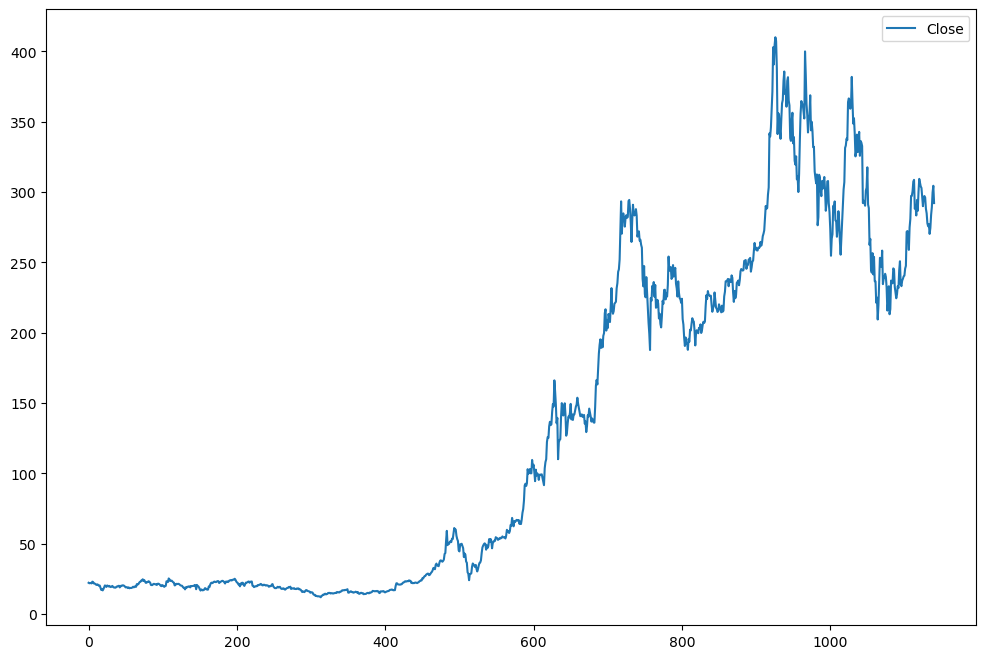

In [55]:
df.plot(figsize=(12,8))

### Set length of the input sequence  ###

In [56]:
# Set length of the input sequence 
#i.e time series steps that are used for future predictions
#Currently us 60 historical data points
length60 = 60

In [57]:
length60

60

In [58]:
len(df)

1141

In [59]:
# Set percentage 
test_percent = 0.2

In [60]:
#Number of data points reserved for testing 
# 20 percent
len(df)*test_percent

228.20000000000002

In [61]:
# Need to find the length of testing datasets
test_length = np.round(len(df)*test_percent)

test_length

228.0

In [62]:
# Testing data set starts at this index
split_index = int(len(df) - test_length)

split_index

913

In [63]:
# The testing data set starts at this index
data_train = df.iloc[: split_index]

# Testing dataset
data_test = df.iloc[split_index - length60 :]

In [64]:
data_train.head(5)

,Close
0,22.223333
1,21.879999
2,22.153334
3,21.940001
4,21.811333


In [65]:
data_train.tail()

,Close
908,263.980011
909,268.573334
910,270.359985
911,272.773346
912,281.010010


In [66]:
data_test.head(5)

,Close
853,214.460007
854,219.206665
855,214.926666
856,215.660004
857,225.783340


In [67]:
data_test.tail()

,Close
1136,283.700012
1137,289.260010
1138,299.679993
1139,304.420013
1140,292.130005


### Normalize Data (Scale it into the range [0,1]) ###

In [68]:
# Create a MinMaxScaler to normalize the data
scaler = MinMaxScaler()

In [69]:
# ONLY scale the traing data - Not scale the testing data

scaler.fit(data_train)

MinMaxScaler()

In [70]:
normalized_train = scaler.transform(data_train)

normalized_test = scaler.transform(data_test)

### Create TimeseriesGenerator for Training ###

In [71]:
# TimeseriesGenerator : Generate time series batches for traing/testing
#Set the length of the input sequence as above
#length60
batch_size32 = 32

#Create a TimeSeriesGenerator for training: train_tsGenerator
# TS (inputs, outpus, length, batch_size)
train_tsGenerator60 = TimeseriesGenerator(normalized_train, normalized_train, length=length60, batch_size=batch_size32)

In [72]:
len(normalized_train)

913

In [73]:
len(train_tsGenerator60)

27

In [31]:
#What does the first batch look like?
X,y = train_tsGenerator60[0]

In [213]:
# print(X)

X

array([[[0.02585678],
        [0.02499422],
        [0.02568092],
        ...,
        [0.01656121],
        [0.01672869],
        [0.01755106]],

       [[0.02499422],
        [0.02568092],
        [0.02514496],
        ...,
        [0.01672869],
        [0.01755106],
        [0.01888426]],

       [[0.02568092],
        [0.02514496],
        [0.02482171],
        ...,
        [0.01755106],
        [0.01888426],
        [0.01771352]],

       ...,

       [[0.01879884],
        [0.01820929],
        [0.01915727],
        ...,
        [0.0217617 ],
        [0.02337126],
        [0.02403451]],

       [[0.01820929],
        [0.01915727],
        [0.02028446],
        ...,
        [0.02337126],
        [0.02403451],
        [0.02344663]],

       [[0.01915727],
        [0.02028446],
        [0.01863638],
        ...,
        [0.02403451],
        [0.02344663],
        [0.02306979]]])

In [214]:
# print(y)

y

array([[0.01888426],
       [0.01771352],
       [0.01890101],
       [0.01972505],
       [0.01878545],
       [0.02353708],
       [0.02296594],
       [0.0232289 ],
       [0.02564742],
       [0.02743452],
       [0.02777117],
       [0.02993847],
       [0.03001384],
       [0.03213423],
       [0.02907255],
       [0.03069216],
       [0.02822842],
       [0.02590368],
       [0.02579984],
       [0.02730555],
       [0.02772428],
       [0.02863374],
       [0.02746467],
       [0.02614486],
       [0.02208998],
       [0.02180525],
       [0.0217617 ],
       [0.02337126],
       [0.02403451],
       [0.02344663],
       [0.02306979],
       [0.02343156]])

# Build, Train, and Test Model #

### Build LTSM Model ###

In [76]:
# Set number of features

# Only using one feature: Close price
n_features = 1

In [77]:
# define model
model = Sequential()

# Add on LSTM layer
# This layer has 50 LSTM cells
# Activation fuctions: relu
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(length60, n_features)))

# Dropout layer
model.add(Dropout(0.2))

model.add(LSTM(units=50, activation='relu', return_sequences=True))

model.add(Dropout(0.2))

model.add(LSTM(units=50, activation='relu'))

model.add(Dense(1))

### Compile Model ###

In [78]:
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 60, 50)            10400     
                                                                 
 dropout_2 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_4 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_3 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trai

In [80]:
model.fit(train_tsGenerator60, epochs=100)

Epoch 1/100
27/27 [==============================] - 3s 94ms/step - loss: 0.0038
Epoch 2/100
27/27 [==============================] - 3s 98ms/step - loss: 0.0044
Epoch 3/100
27/27 [==============================] - 3s 107ms/step - loss: 0.0042
Epoch 4/100
27/27 [==============================] - 2s 65ms/step - loss: 0.0034
Epoch 5/100
27/27 [==============================] - 1s 51ms/step - loss: 0.0035
Epoch 6/100
27/27 [==============================] - 2s 56ms/step - loss: 0.0039
Epoch 7/100
27/27 [==============================] - 2s 55ms/step - loss: 0.0040
Epoch 8/100
27/27 [==============================] - 2s 68ms/step - loss: 0.0037
Epoch 9/100
27/27 [==============================] - 2s 68ms/step - loss: 0.0048
Epoch 10/100
27/27 [==============================] - 2s 69ms/step - loss: 0.0053
Epoch 11/100
27/27 [==============================] - 2s 70ms/step - loss: 0.0029
Epoch 12/100
27/27 [==============================] - 2s 67ms/step - loss: 0.0034
Epoch 13/100
27/27 [====

## Visualize Models Performance after Training ##

In [81]:
loss_history_keys = model.history.history.keys()
loss_history_keys

dict_keys(['loss'])

<AxesSubplot: >

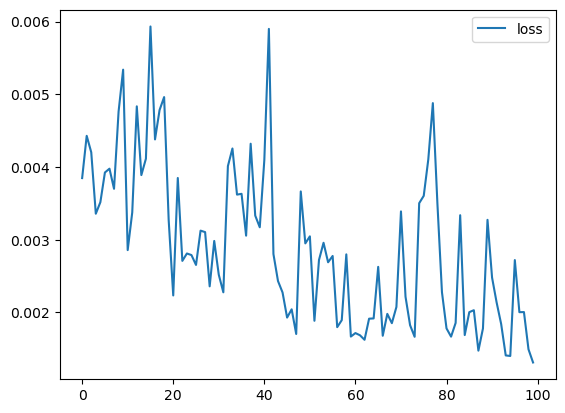

In [82]:
df_model_loss = pd.DataFrame(model.history.history)
df_model_loss.plot()

### Prediction for Testing: Using TimeseriesGenerator ###

In [83]:
batch_size1 = 1
test_tsGenerator60 = TimeseriesGenerator(normalized_test, normalized_test, length=length60, batch_size=batch_size1)

In [84]:
normalized_prediction = model.predict(test_tsGenerator60) 

228/228 [==============================] - 1s 5ms/step


In [85]:
normalized_prediction

array([[0.9113258 ],
       [0.91855097],
       [0.9269245 ],
       [0.9357117 ],
       [0.9451923 ],
       [0.9553691 ],
       [0.96890044],
       [0.98503876],
       [1.0031599 ],
       [1.0231092 ],
       [1.0447295 ],
       [1.069588  ],
       [1.0951849 ],
       [1.1211716 ],
       [1.1466681 ],
       [1.1702312 ],
       [1.188825  ],
       [1.1950328 ],
       [1.1928009 ],
       [1.1848009 ],
       [1.1721401 ],
       [1.1561098 ],
       [1.1406237 ],
       [1.1284807 ],
       [1.1205353 ],
       [1.1177702 ],
       [1.1199856 ],
       [1.124361  ],
       [1.1298323 ],
       [1.1341648 ],
       [1.1389966 ],
       [1.1445149 ],
       [1.14844   ],
       [1.1500825 ],
       [1.1462985 ],
       [1.1377751 ],
       [1.128226  ],
       [1.119857  ],
       [1.1108658 ],
       [1.1022302 ],
       [1.0920871 ],
       [1.0806653 ],
       [1.0698038 ],
       [1.0579742 ],
       [1.0462284 ],
       [1.0336044 ],
       [1.0229771 ],
       [1.017

In [86]:
len(normalized_prediction)

228

In [87]:
# convert normalized predictions back to the true values
prediction = scaler.inverse_transform(normalized_prediction)

In [88]:
prediction_index = np.arange(913, 1141, step=1)

df_prediction = pd.DataFrame(data=prediction, index=prediction_index, columns=['Prediction'])

In [89]:
df_prediction

,Prediction
913,269.318909
914,271.359528
915,273.724487
916,276.206268
917,278.883881
...,...
1136,277.368561
1137,275.793304
1138,275.274933
1139,275.975952


<AxesSubplot: >

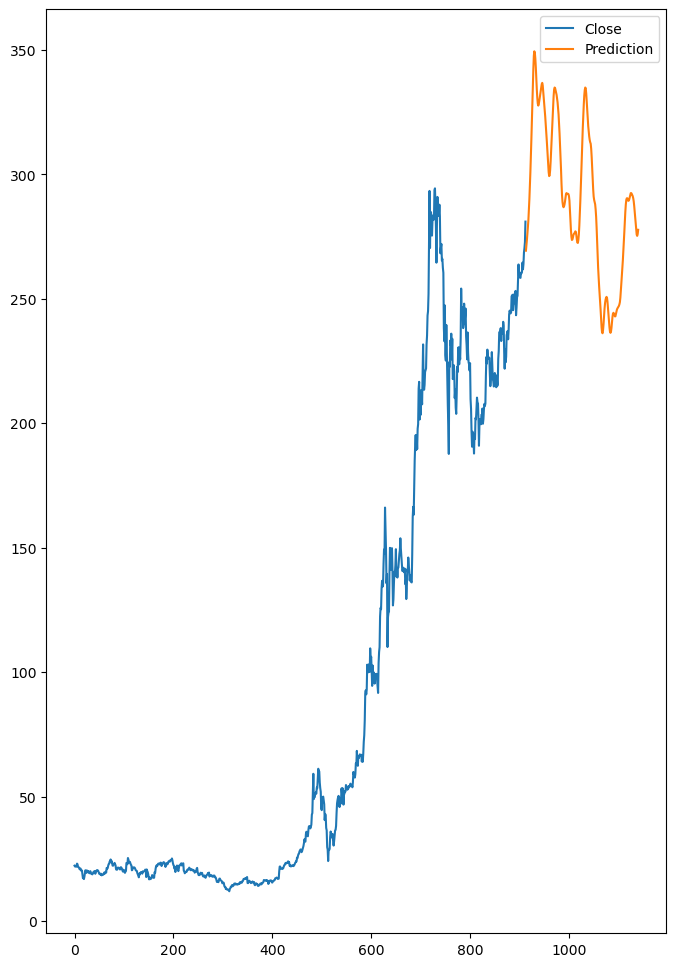

In [90]:
ax = data_train.plot()
df_prediction.plot(ax=ax, figsize=(8, 12))

<AxesSubplot: >

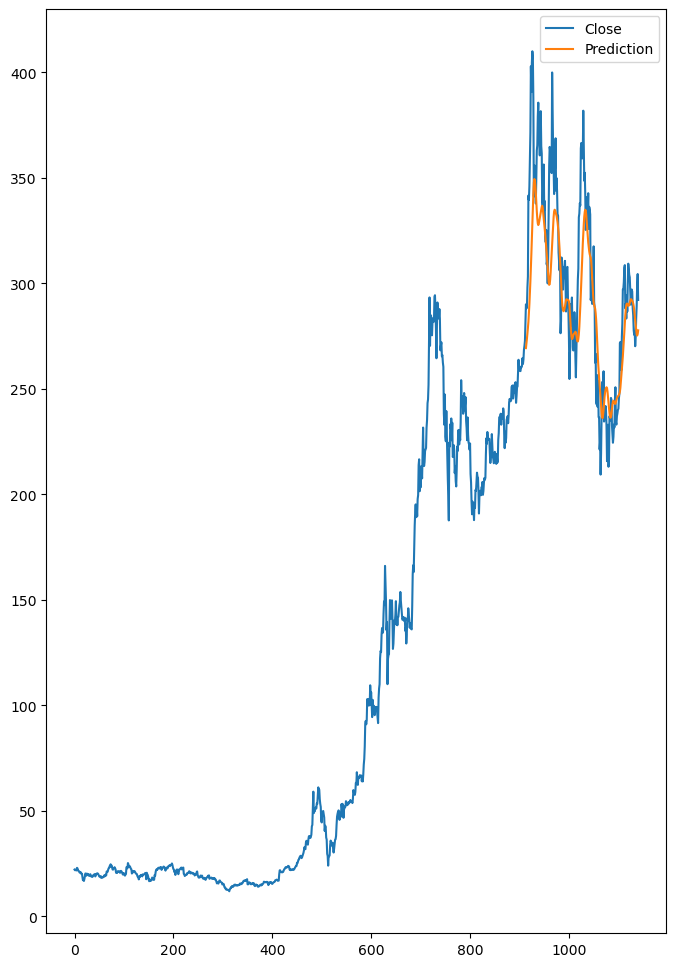

In [91]:
ax = df.plot()
df_prediction.plot(ax=ax, figsize=(8, 12))

# Time Series Forecasting with LSTM

# Overview


### Time Series forecasting:


### --) Forecast into the "Future" or unknown range


### --)Should employ all the available data


### --)i.e., NOt spilt the data into training/testing

In [92]:
#Still use Minmax Scaler to normalize the full input dataset

full_scaler = MinMaxScaler()
normalized_full_data = full_scaler.fit_transform(df)

In [93]:
# create timeseries Generator for forecasting
forecast_tsGenerator = TimeseriesGenerator(normalized_full_data, normalized_full_data, length=length60, batch_size=batch_size32)

In [94]:
forecast = []
# Set periods with the time span of forecasting
# Let's forecast for the next 117 business days (07/01/2019 - 12/15/2019)
periods = 117

first_eval_batch = normalized_full_data[-length60:]
current_batch = first_eval_batch.reshape((1, length60, n_features))

for i in range(periods):
    
    # get prediction 1 time stamp ahead([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    forecast.append(current_pred)
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:], [[current_pred]],axis=1)

1/1 [==============================] - 0s 18ms/step


# Inverse to Transform Normalized Data Back into True Values

In [95]:
forecast = full_scaler.inverse_transform(forecast)

forecast

array([[305.16974056],
       [308.20171844],
       [311.53687749],
       [315.0286924 ],
       [318.56167012],
       [322.05507461],
       [325.45794468],
       [328.74109863],
       [331.89018287],
       [334.89641917],
       [337.7560827 ],
       [340.47202047],
       [343.04857413],
       [345.49058359],
       [347.80298362],
       [349.99044805],
       [352.05755579],
       [354.00890949],
       [355.8491355 ],
       [357.58276529],
       [359.21437779],
       [360.74862308],
       [362.189914  ],
       [363.54268712],
       [364.81145017],
       [366.00026014],
       [367.11336378],
       [368.15467571],
       [369.12811055],
       [370.03727449],
       [370.88589235],
       [371.67733307],
       [372.41494187],
       [373.101803  ],
       [373.74107187],
       [374.33559547],
       [374.88812591],
       [375.40132038],
       [375.87764627],
       [376.31952353],
       [376.72925347],
       [377.10885273],
       [377.46050399],
       [377

In [96]:
df

,Close
0,22.223333
1,21.879999
2,22.153334
3,21.940001
4,21.811333
...,...
1136,283.700012
1137,289.260010
1138,299.679993
1139,304.420013


In [127]:
# calculate forecast index

forecast_index = np.arange(1141, 1258, step=1)

In [128]:
forecast_df=pd.DataFrame(data=forecast,index=forecast_index,columns=['Forecast'])

In [122]:
forecast_df

,Forecast
1141,305.169741
1142,308.201718
1143,311.536877
1144,315.028692
1145,318.561670
...,...
1253,381.677638
1254,381.678682
1255,381.679726
1256,381.680651


<AxesSubplot: >

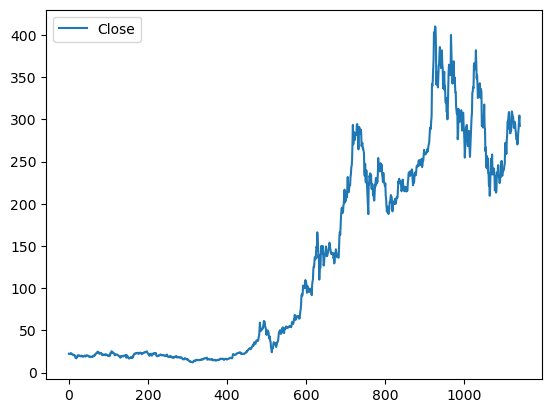

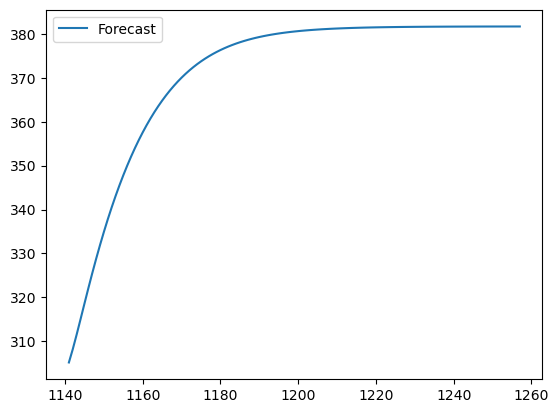

In [103]:
df.plot()
forecast_df.plot()

<AxesSubplot: >

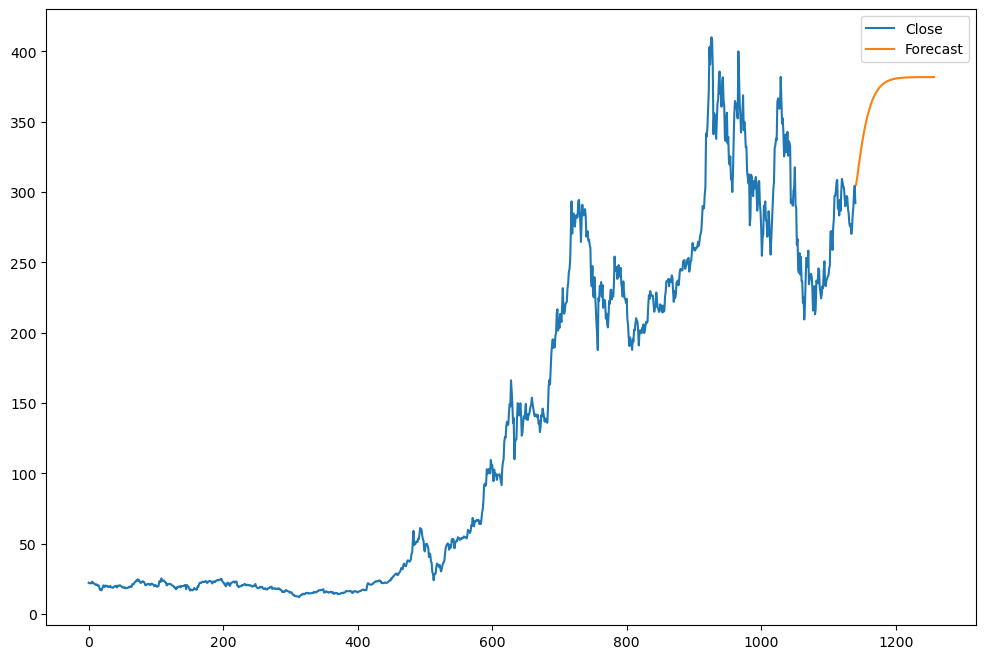

In [104]:
ax=df.plot()
forecast_df.plot(ax=ax, figsize=(12,8))

In [137]:
df.tail()

,Close
1136,283.700012
1137,289.260010
1138,299.679993
1139,304.420013
1140,292.130005


In [149]:
for idx in forecast_df.index:
    df.loc[idx, 'Close'] = forecast_df.loc[idx, 'Forecast']

df

,Close
0,22.223333
1,21.879999
2,22.153334
3,21.940001
4,21.811333
...,...
1253,381.677638
1254,381.678682
1255,381.679726
1256,381.680651


In [183]:
df_ALL_2022 = 'Downloads/TSLA1.csv'

In [184]:
df_ALL_JUL_DEC_2022 = pd.read_csv(df_ALL_2022)

In [185]:
len(df_ALL_JUL_DEC_2022)

1258

In [186]:
df_JUL_DEC_2022 = df_ALL_JUL_DEC_2022.iloc[:,4:5]

In [187]:
df_JUL_DEC_2022

,Close
0,22.223333
1,21.879999
2,22.153334
3,21.940001
4,21.811333
...,...
1253,196.880005
1254,207.630005
1255,205.710007
1256,202.770004


<AxesSubplot: >

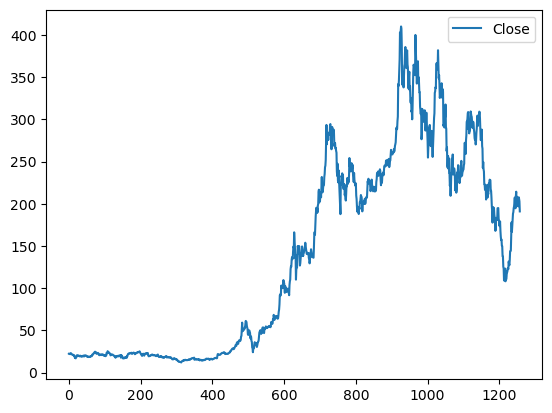

In [188]:
df_JUL_DEC_2022.plot()

In [189]:
forecast_df['Forecast'].values

array([305.16974056, 308.20171844, 311.53687749, 315.0286924 ,
       318.56167012, 322.05507461, 325.45794468, 328.74109863,
       331.89018287, 334.89641917, 337.7560827 , 340.47202047,
       343.04857413, 345.49058359, 347.80298362, 349.99044805,
       352.05755579, 354.00890949, 355.8491355 , 357.58276529,
       359.21437779, 360.74862308, 362.189914  , 363.54268712,
       364.81145017, 366.00026014, 367.11336378, 368.15467571,
       369.12811055, 370.03727449, 370.88589235, 371.67733307,
       372.41494187, 373.101803  , 373.74107187, 374.33559547,
       374.88812591, 375.40132038, 375.87764627, 376.31952353,
       376.72925347, 377.10885273, 377.46050399, 377.78598662,
       378.08717491, 378.36575331, 378.62333513, 378.86139131,
       379.08134535, 379.28445468, 379.47204789, 379.6451926 ,
       379.80500388, 379.95245447, 380.08851708, 380.21390345,
       380.32961005, 380.43627744, 380.53471227, 380.6253416 ,
       380.70892461, 380.78598326, 380.85703949, 380.92

In [190]:
df_JUL_DEC_2022['Forecast'] = df.values

In [191]:
df_JUL_DEC_2022

,Close,Forecast
0,22.223333,22.223333
1,21.879999,21.879999
2,22.153334,22.153334
3,21.940001,21.940001
4,21.811333,21.811333
...,...,...
1253,196.880005,381.677638
1254,207.630005,381.678682
1255,205.710007,381.679726
1256,202.770004,381.680651


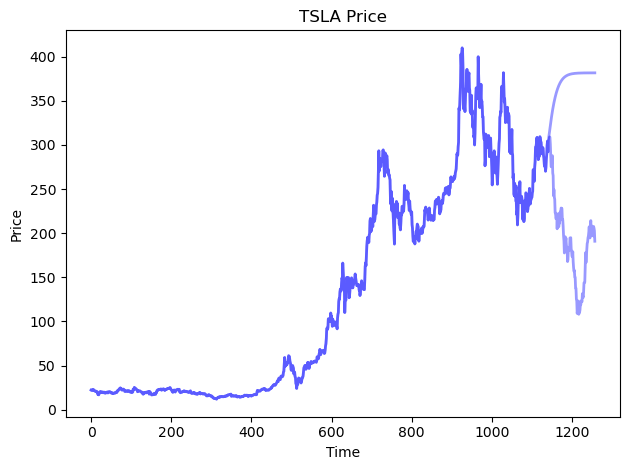

In [211]:
plt.plot(df_JUL_DEC_2022, 'b', linewidth=2, alpha=0.4,)

plt.xlabel('Time')
plt.ylabel('Price')
plt.title('TSLA Price')

plt.tight_layout()